<a href="https://colab.research.google.com/github/HarshitJuneja73/HarshitJuneja73/blob/main/four_class_SWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import PIL
import keras
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import warnings
import cv2

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Dropout,MaxPooling2D,MaxPool2D,BatchNormalization
from keras.optimizers import SGD,Adam
# from keras.utils import np_utils
from sklearn.utils import shuffle
from PIL import Image
from tensorflow.keras.regularizers import l2
from keras.utils import to_categorical

In [3]:
!unzip /content/drive/MyDrive/normalSWTX3.zip
!unzip /content/drive/MyDrive/asthmaSWTX3.zip
!unzip /content/drive/MyDrive/pneumoniaSWTX3.zip
!unzip /content/drive/MyDrive/COPDSWTX3.zip


Archive:  /content/drive/MyDrive/normalSWTX3.zip
   creating: normalSWTX3/
  inflating: __MACOSX/._normalSWTX3  
  inflating: normalSWTX3/DP72_N,N,P R U,24,F_part3.png  
  inflating: __MACOSX/normalSWTX3/._DP72_N,N,P R U,24,F_part3.png  
  inflating: normalSWTX3/EP82_N,N,P L U,38,M_part2.png  
  inflating: __MACOSX/normalSWTX3/._EP82_N,N,P L U,38,M_part2.png  
  inflating: normalSWTX3/DP98_N,N,P L L,53,M_part2.png  
  inflating: __MACOSX/normalSWTX3/._DP98_N,N,P L L,53,M_part2.png  
  inflating: normalSWTX3/DP103_N,N,P R U,81,F_part1.png  
  inflating: __MACOSX/normalSWTX3/._DP103_N,N,P R U,81,F_part1.png  
  inflating: normalSWTX3/DP85_N,N,A R U,33,M_part1.png  
  inflating: __MACOSX/normalSWTX3/._DP85_N,N,A R U,33,M_part1.png  
  inflating: normalSWTX3/DP76_N,N,A L U,31,M_part3.png  
  inflating: __MACOSX/normalSWTX3/._DP76_N,N,A L U,31,M_part3.png  
  inflating: normalSWTX3/BP94_N,N,P L L,24,M_part3.png  
  inflating: __MACOSX/normalSWTX3/._BP94_N,N,P L L,24,M_part3.png  
  inflatin

In [32]:

X = []
Y = []

# Load images from the "normalSWTX3" directory
images = "/content/normalSWTX3"
datapath = os.path.join(images, '*g')
files = glob.glob(datapath)
for f in files:
    img = Image.open(f).convert("RGB")  # Convert to RGB format
    img = img.resize((256, 256))
    X.append(np.asarray(img))
    Y.append(0)

# Load images from the "asthmaSWTX3" directory
images = "/content/asthmaSWTX3"
datapath = os.path.join(images, '*g')
files = glob.glob(datapath)
for f in files:
    img = Image.open(f).convert("RGB")  # Convert to RGB format
    img = img.resize((256, 256))
    X.append(np.asarray(img))
    Y.append(1)

# Load images from the "pneumoniaSWTX3" directory
images = "/content/pneumoniaSWTX3"
datapath = os.path.join(images, '*g')
files = glob.glob(datapath)
for f in files:
    img = Image.open(f).convert("RGB")  # Convert to RGB format
    img = img.resize((256, 256))
    X.append(np.asarray(img))
    Y.append(2)

# Load images from the "COPDSWTX3" directory
images = "/content/COPDSWTX3"
datapath = os.path.join(images, '*g')
files = glob.glob(datapath)
for f in files:
    img = Image.open(f).convert("RGB")  # Convert to RGB format
    img = img.resize((256, 256))
    X.append(np.asarray(img))
    Y.append(3)

# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)


print(np.shape(Y))

(1242,)


In [33]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, num_classes=4)

In [34]:
print(np.shape(Y))

(1242, 4)


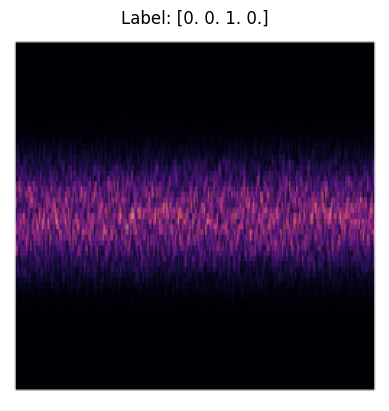

In [35]:
import random
import matplotlib.pyplot as plt

# Choose a random index
random_index = random.randint(0, len(X) - 1)

# Get the image and label at the random index
random_image = X[random_index]
random_label = Y[random_index]

# Display the image
plt.imshow(random_image)
plt.title(f"Label: {random_label}")
plt.axis('off')  # Turn off axis labels
plt.show()


In [36]:
print(np.shape(X))
print(np.shape(Y))
# print(X[1])

(1242, 256, 256, 3)
(1242, 4)


In [7]:
X = np.asarray(X)
Y = np.asarray(Y)

In [37]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore", category = DeprecationWarning)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 2/10, train_size=8/10, random_state = 1)
X_train, X_val, Y_train, Y_val = train_test_split( X_train, Y_train, test_size = 1/8, train_size = 7/8,random_state = 1)

In [38]:
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(Y_train))
print(np.shape(Y_val))
# print(X[1])

(868, 256, 256, 3)
(125, 256, 256, 3)
(868, 4)
(125, 4)


In [10]:
from keras.layers import GRU, Attention, Lambda

In [14]:
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Flatten,
    GRU,
    Attention,
    Dense,
    Dropout,
    Input,
    Reshape
)
from tensorflow.keras.models import Model

In [41]:
import tensorflow.keras.backend as K

def reshape_for_gru(input_tensor):
    # Get the batch size dynamically
    batch_size = K.shape(input_tensor)[0]
    return K.reshape(input_tensor, (batch_size, -1, 256))

In [48]:
def create_model():
    input_layer = Input(shape=(256, 256, 3))
    x = Conv2D(60, kernel_size=(3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((3, 3))(x)
    x = BatchNormalization()(x)

    x = Conv2D(100, (3, 3), activation='relu')(x)
    x = MaxPooling2D((3, 3))(x)
    x = BatchNormalization()(x)

    x = Conv2D(120, (3, 3), activation='relu')(x)
    x = MaxPooling2D((3, 3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Flatten()(x)

    # Use Lambda layer to reshape for GRU
    # x = Lambda(reshape_for_gru)(x)

    # Add a GRU layer
    # x = GRU(128, return_sequences=True)(x)  # You can adjust the number of units as needed

    # Add an Attention layer
    x = Attention()([x, x])  # Self-attention mechanism

    x = Flatten()(x)  # Flatten the output of the Attention layer

    x = Dense(600, activation='relu')(x)
    x = Dense(200, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(50, activation='relu')(x)
    output_layer = Dense(4, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [49]:
model = create_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_21 (Conv2D)          (None, 255, 255, 60)         780       ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_21 (MaxPooli  (None, 85, 85, 60)           0         ['conv2d_21[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_21 (Ba  (None, 85, 85, 60)           240       ['max_pooling2d_21[0][0]

In [39]:
np.shape(Y_train)

(868, 4)

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, Y_train, epochs=30,validation_data=(X_val, Y_val))
print(history)

Epoch 1/30
28/28 [==============================] - 149s 5s/step - loss: 1.5842 - accuracy: 0.4217 - val_loss: 5.6001 - val_accuracy: 0.2240
Epoch 2/30
28/28 [==============================] - 141s 5s/step - loss: 1.0137 - accuracy: 0.5887 - val_loss: 3.8926 - val_accuracy: 0.2560
Epoch 3/30
28/28 [==============================] - 145s 5s/step - loss: 0.9322 - accuracy: 0.6152 - val_loss: 3.5461 - val_accuracy: 0.2560
Epoch 4/30
28/28 [==============================] - 142s 5s/step - loss: 0.8168 - accuracy: 0.6613 - val_loss: 2.8686 - val_accuracy: 0.2560
Epoch 5/30
28/28 [==============================] - 143s 5s/step - loss: 0.8053 - accuracy: 0.6498 - val_loss: 1.9743 - val_accuracy: 0.2640
Epoch 6/30
28/28 [==============================] - 137s 5s/step - loss: 0.7615 - accuracy: 0.6993 - val_loss: 1.8916 - val_accuracy: 0.2640
Epoch 7/30
28/28 [==============================] - 137s 5s/step - loss: 0.6533 - accuracy: 0.7419 - val_loss: 2.1419 - val_accuracy: 0.2880
Epoch 8/30
28

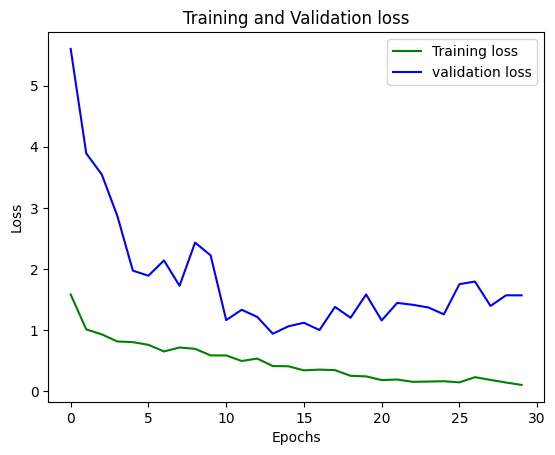

In [51]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,30)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

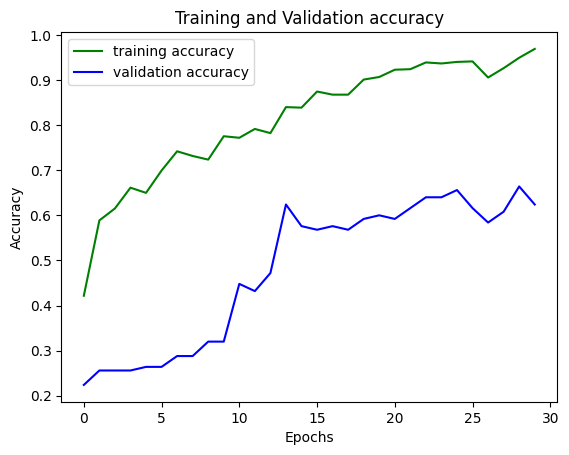

In [52]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,30)
plt.plot(epochs, loss_train, 'g', label='training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8/8 [==============================] - 13s 2s/step


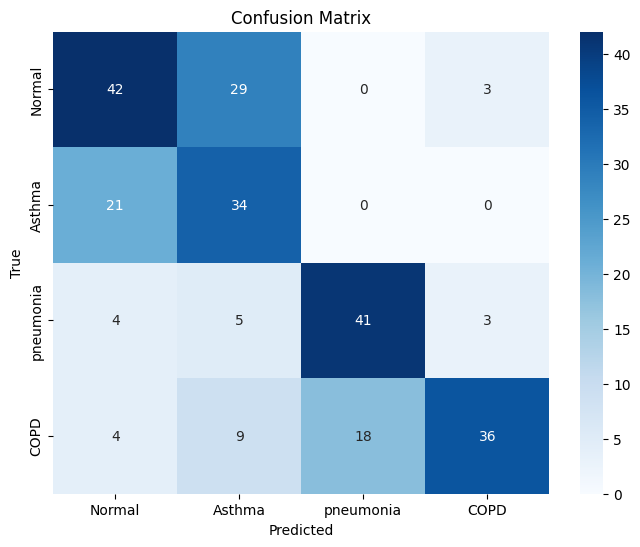

In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a trained model 'model' and a set of test data 'X_test' and corresponding labels 'y_test'
# Replace 'model', 'X_test', and 'y_test' with your actual model and test data

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels if you have them (replace with your class names)
class_labels = ["Normal", "Asthma", "pneumonia", "COPD"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [58]:
model.save('four_class_SWT_65valacc.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
